In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

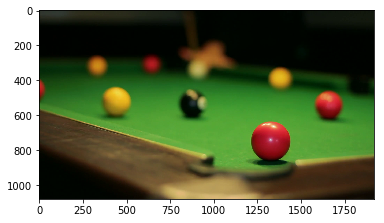

In [32]:
path='./3.png'
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

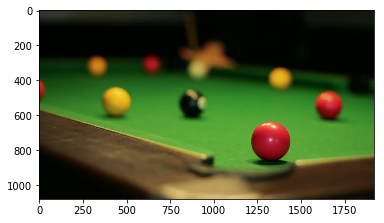

In [33]:
path = './3.png'
img = cv2.imread(path)
img = cv2.GaussianBlur(img,(5,5),0)
img1 = cv2.bilateralFilter(img,9,25,75)
r = int(np.sqrt(np.size(img))/100)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img)

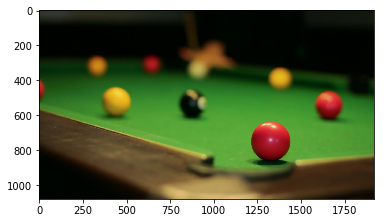

In [34]:
plt.imshow(img1)

In [35]:
#default setting for red mask
#lower_red=np.array([169, 100, 100])             
#upper_red=np.array([189, 255, 255])

lower_red=np.array([169, 100, 100])             
upper_red=np.array([189, 255, 255])
# lower_red=np.array([0, 50, 50])             
# upper_red=np.array([8, 170, 200])

mask_red=cv2.inRange(hsv,lower_red,upper_red)
#inRange는 범위 안에 들어가면 1, 그렇지 않으면 0으로 만들어 준다
res_red=cv2.bitwise_and(img,img,mask=mask_red)
#bitwise_and 함수는 둘다 0이 mask가 검정색이 아닌 경우만 통과, mask 이외 부분을 모두 제거
not_red=cv2.bitwise_not(img,img,mask=mask_red)


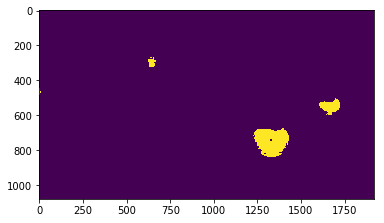

In [36]:
plt.imshow(mask_red)

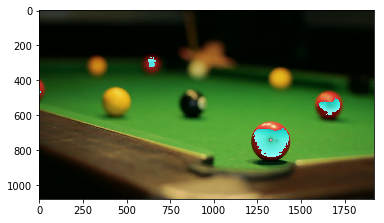

In [37]:
plt.imshow(not_red)

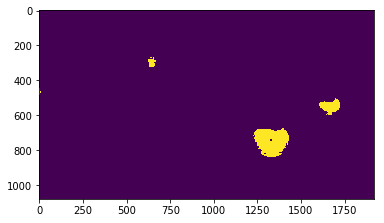

In [38]:
plt.imshow(mask_red)

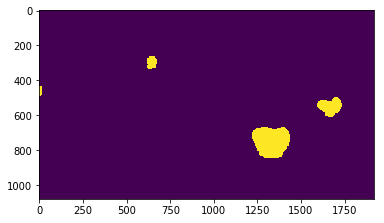

In [39]:
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(mask_red, kernel, iterations=1)
plt.imshow(img_dilation)

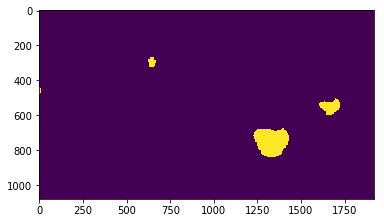

In [40]:
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
plt.imshow(img_erosion)

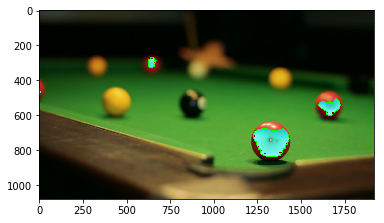

In [41]:
imgray = img_erosion
ret,thresh = cv2.threshold(imgray,10,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours_ = []

#reject small contour areas
for c in contours:
    if cv2.contourArea(c) >= 500:
        contours_.append(c)
length = len(contours_)
cv2.drawContours(img, contours_, -1, (0,255,0), 3)
plt.imshow(img)

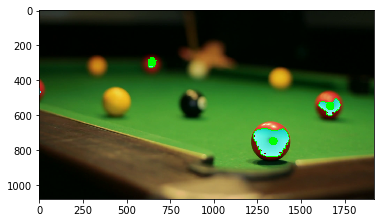

In [42]:
#points = np.argwhere(mask_red)
points = np.array(contours_)
center = []
if length:
    for i in range(0, length):
        x = int(np.mean(points[i][:,0,0]))
        y = int(np.mean(points[i][:,0,1]))
        cv2.circle(img, (x, y),r,(0,255,0),-1)
plt.imshow(img)

In [14]:
contours_

[array([[[1398,  677]],
 
        [[1397,  678]],
 
        [[1396,  678]],
 
        [[1395,  679]],
 
        [[1393,  679]],
 
        [[1392,  680]],
 
        [[1391,  680]],
 
        [[1390,  681]],
 
        [[1390,  682]],
 
        [[1389,  683]],
 
        [[1388,  683]],
 
        [[1387,  684]],
 
        [[1386,  684]],
 
        [[1385,  685]],
 
        [[1374,  685]],
 
        [[1373,  686]],
 
        [[1372,  686]],
 
        [[1369,  689]],
 
        [[1367,  689]],
 
        [[1366,  690]],
 
        [[1359,  690]],
 
        [[1358,  691]],
 
        [[1347,  691]],
 
        [[1344,  688]],
 
        [[1332,  688]],
 
        [[1331,  687]],
 
        [[1330,  687]],
 
        [[1327,  684]],
 
        [[1327,  683]],
 
        [[1326,  683]],
 
        [[1325,  682]],
 
        [[1317,  682]],
 
        [[1316,  681]],
 
        [[1314,  681]],
 
        [[1313,  680]],
 
        [[1306,  680]],
 
        [[1305,  679]],
 
        [[1299,  679]],
 
        [[12